#LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ABE

Pratinjau Dataset:
         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  6.4987  6.6009  6.4668  6.5753   55766        0
1  2005-02-28  6.6072  6.7669  6.5944  6.6263   49343        0
2  2005-03-01  6.6391  6.6773  6.6072  6.6072   31643        0
3  2005-03-02  6.5753  6.6072  6.5434  6.5816   27101        0
4  2005-03-03  6.5753  6.6135  6.5562  6.5944   17387        0


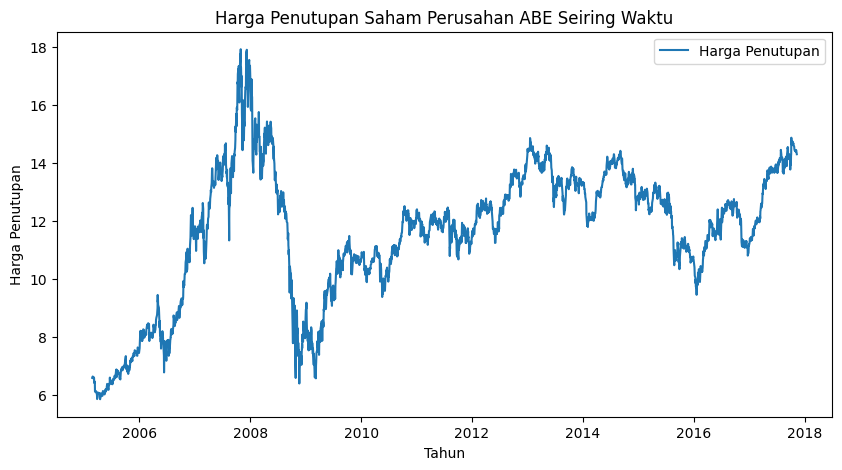

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0594
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0014
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0013
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0012
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0010
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0010
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0011
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 8.3377e-04
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 7.7991e-04
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 7.9013e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


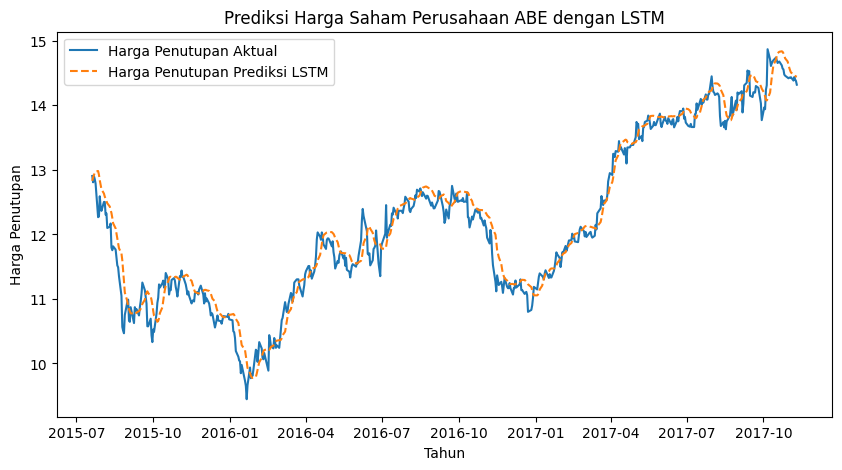

Mean Squared Error pada Data Uji: 0.05


In [ ]:
# Langkah 1: Memuat dataset
file_path = 'abe.us.txt'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print("Pratinjau Dataset:")
print(data.head())

# Langkah 2: Pra-pemrosesan data
# Mengubah kolom 'Date' menjadi format datetime dan menjadikannya sebagai index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memfilter kolom 'Close' untuk prediksi
time_series = data['Close']

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(data.index, time_series, label='Harga Penutupan')
plt.title('Harga Penutupan Saham Perusahan ABE Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menormalkan data untuk LSTM (LSTM biasanya bekerja lebih baik dengan data yang terstandarisasi)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Langkah 3: Membuat data pelatihan dan pengujian
train_size = int(len(time_series) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Fungsi untuk mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data pelatihan dan pengujian
time_step = 60  # Gunakan 60 hari sebelumnya untuk memprediksi hari berikutnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubah bentuk X_train dan X_test agar sesuai dengan input LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Langkah 4: Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 5: Melatih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Langkah 6: Evaluasi Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Mengembalikan ke skala asli

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Harga Penutupan Aktual')
plt.plot(data.index[train_size + time_step + 1:], y_pred_rescaled, label='Harga Penutupan Prediksi LSTM', linestyle='--')
plt.title('Prediksi Harga Saham Perusahaan ABE dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menghitung mean squared error untuk evaluasi
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f"Mean Squared Error pada Data Uji: {mse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━

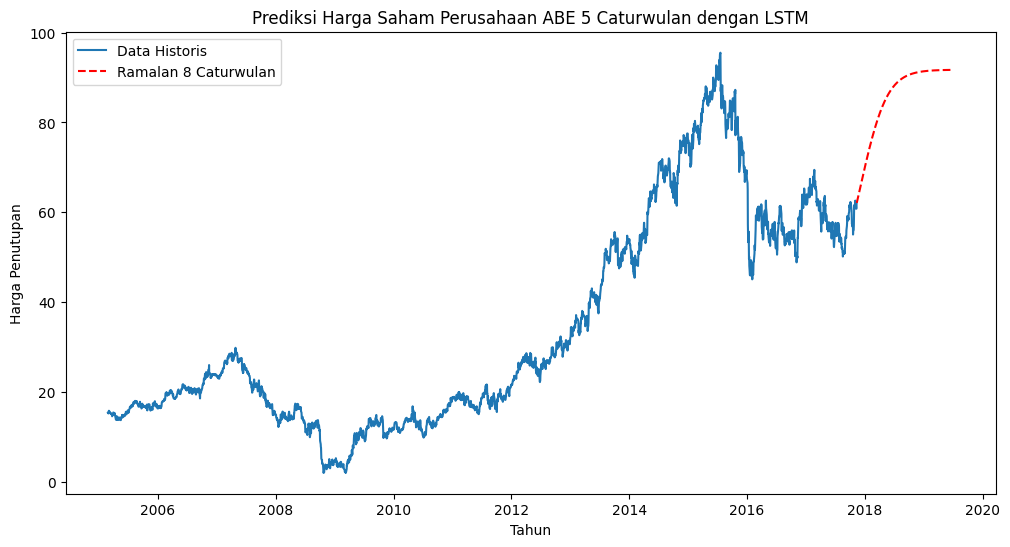

In [ ]:
# Langkah 7: Memprediksi 8 Caturwulan ke Depan
future_steps = 5 * 4 * 30  # 8 caturwulan, setiap caturwulan 4 bulan dengan 30 hari/bulan
last_data = time_series_scaled[-time_step:].reshape(1, time_step, 1)

# Melakukan prediksi untuk 8 caturwulan ke depan
future_forecast = []
for _ in range(future_steps):
    predicted_value = model.predict(last_data)
    future_forecast.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_forecast_rescaled = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Membuat tanggal masa depan (frekuensi harian)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Visualisasi ramalan masa depan
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label='Data Historis')
plt.plot(future_dates, future_forecast_rescaled, label='Ramalan 8 Caturwulan', linestyle='--', color='red')
plt.title('Prediksi Harga Saham Perusahaan ABE 5 Caturwulan dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


# ABEO

Pratinjau Dataset:
         Date    Open  High     Low   Close  Volume  OpenInt
0  2014-12-22  3.8500  3.85  3.6699  3.7000   27025        0
1  2014-12-23  3.7000  3.70  3.3300  3.6500    5890        0
2  2014-12-24  3.5500  3.65  3.4200  3.4400    5885        0
3  2014-12-26  3.5190  3.65  3.3744  3.6426    5019        0
4  2014-12-29  3.3001  3.50  3.3001  3.5000   14279        0


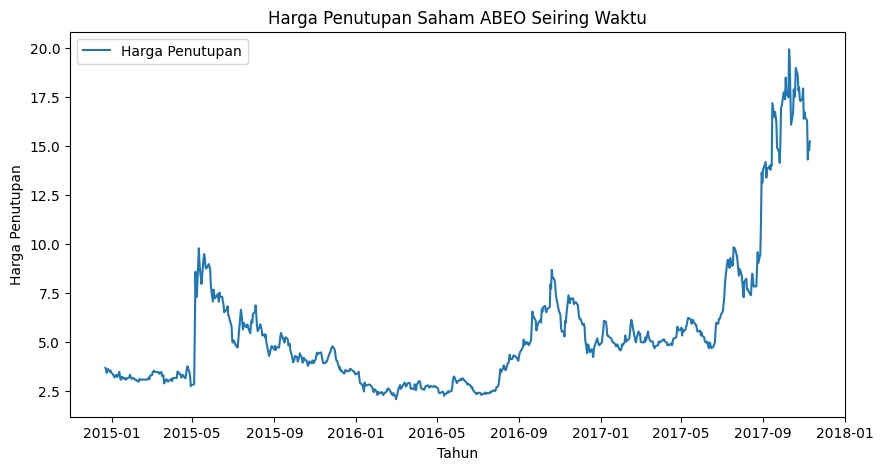

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0174
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0036
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0020
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0020
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0021
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0018
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0015
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0013
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0013
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0014
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step


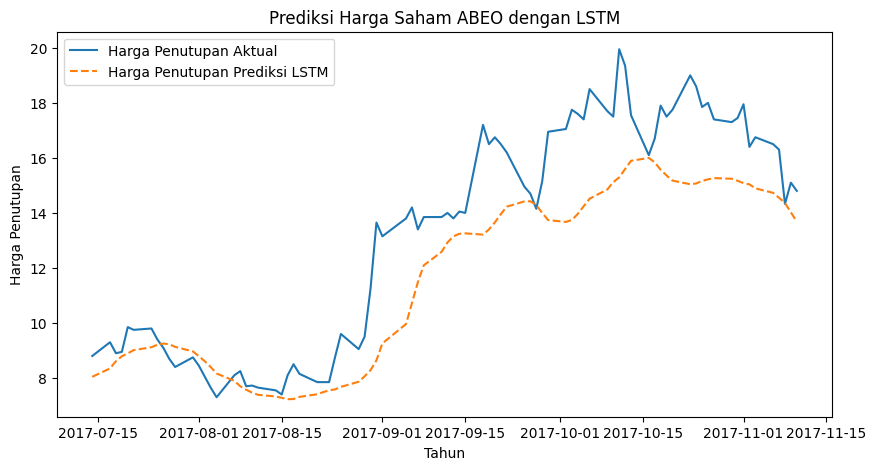

Mean Squared Error pada Data Uji: 4.45


In [ ]:
# Langkah 1: Memuat dataset
file_path = 'abeo.us.txt'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print("Pratinjau Dataset:")
print(data.head())

# Langkah 2: Pra-pemrosesan data
# Mengubah kolom 'Date' menjadi format datetime dan menjadikannya sebagai index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memfilter kolom 'Close' untuk prediksi
time_series = data['Close']

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(data.index, time_series, label='Harga Penutupan')
plt.title('Harga Penutupan Saham ABEO Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menormalkan data untuk LSTM (LSTM biasanya bekerja lebih baik dengan data yang terstandarisasi)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Langkah 3: Membuat data pelatihan dan pengujian
train_size = int(len(time_series) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Fungsi untuk mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data pelatihan dan pengujian
time_step = 60  # Gunakan 60 hari sebelumnya untuk memprediksi hari berikutnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubah bentuk X_train dan X_test agar sesuai dengan input LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Langkah 4: Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 5: Melatih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Langkah 6: Evaluasi Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Mengembalikan ke skala asli

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Harga Penutupan Aktual')
plt.plot(data.index[train_size + time_step + 1:], y_pred_rescaled, label='Harga Penutupan Prediksi LSTM', linestyle='--')
plt.title('Prediksi Harga Saham ABEO dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menghitung mean squared error untuk evaluasi
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f"Mean Squared Error pada Data Uji: {mse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

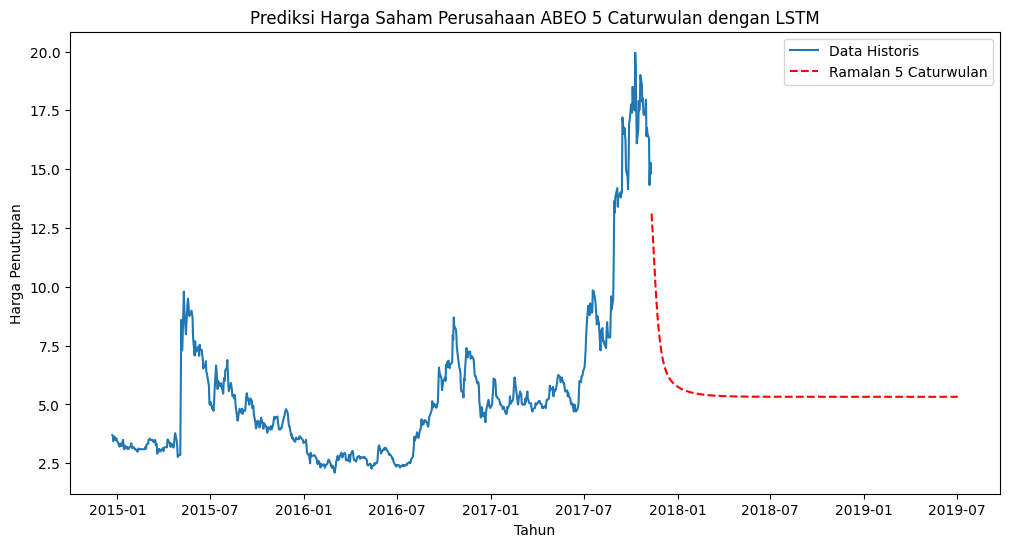

In [ ]:
# Langkah 7: Memprediksi 8 Caturwulan ke Depan
future_steps = 5 * 4 * 30  # 8 caturwulan, setiap caturwulan 4 bulan dengan 30 hari/bulan
last_data = time_series_scaled[-time_step:].reshape(1, time_step, 1)

# Melakukan prediksi untuk 8 caturwulan ke depan
future_forecast = []
for _ in range(future_steps):
    predicted_value = model.predict(last_data)
    future_forecast.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_forecast_rescaled = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Membuat tanggal masa depan (frekuensi harian)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Visualisasi ramalan masa depan
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label='Data Historis')
plt.plot(future_dates, future_forecast_rescaled, label='Ramalan 5 Caturwulan', linestyle='--', color='red')
plt.title('Prediksi Harga Saham Perusahaan ABEO 5 Caturwulan dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


#ABEOW

Pratinjau Dataset:
         Date  Open  High   Low  Close  Volume  OpenInt
0  2014-12-19  0.90  0.90  0.75  0.750   10600        0
1  2014-12-22  1.05  1.05  0.71  0.710   15275        0
2  2014-12-23  0.70  0.74  0.68  0.700    8200        0
3  2014-12-24  0.70  0.72  0.65  0.708   71001        0
4  2014-12-26  0.78  0.78  0.75  0.750    4300        0


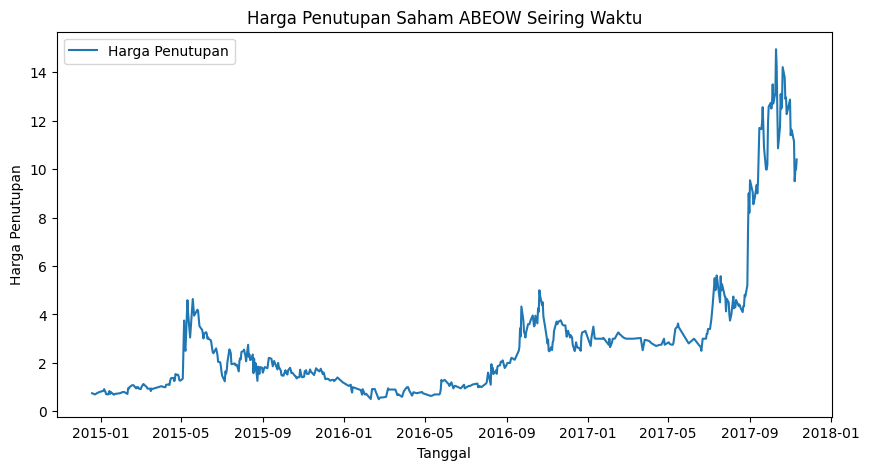

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0091
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0021
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0015
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0015
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0011
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0014
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0012
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0010
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 8.8892e-04
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 8.5443e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


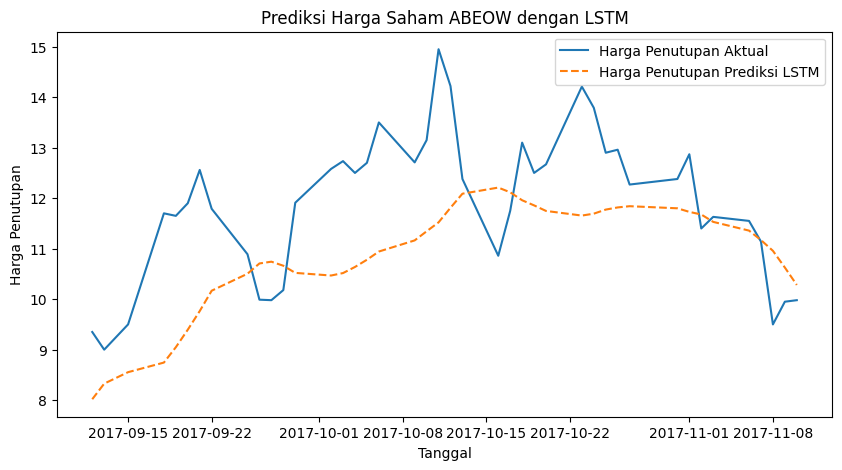

Mean Squared Error pada Data Uji: 2.57


In [ ]:
# Langkah 1: Memuat dataset
file_path = 'abeow.us.txt'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print("Pratinjau Dataset:")
print(data.head())

# Langkah 2: Pra-pemrosesan data
# Mengubah kolom 'Date' menjadi format datetime dan menjadikannya sebagai index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memfilter kolom 'Close' untuk prediksi
time_series = data['Close']

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(data.index, time_series, label='Harga Penutupan')
plt.title('Harga Penutupan Saham ABEOW Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menormalkan data untuk LSTM (LSTM biasanya bekerja lebih baik dengan data yang terstandarisasi)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Langkah 3: Membuat data pelatihan dan pengujian
train_size = int(len(time_series) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Fungsi untuk mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data pelatihan dan pengujian
time_step = 60  # Gunakan 60 hari sebelumnya untuk memprediksi hari berikutnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubah bentuk X_train dan X_test agar sesuai dengan input LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Langkah 4: Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 5: Melatih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Langkah 6: Evaluasi Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Mengembalikan ke skala asli

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Harga Penutupan Aktual')
plt.plot(data.index[train_size + time_step + 1:], y_pred_rescaled, label='Harga Penutupan Prediksi LSTM', linestyle='--')
plt.title('Prediksi Harga Saham ABEOW dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menghitung mean squared error untuk evaluasi
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f"Mean Squared Error pada Data Uji: {mse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

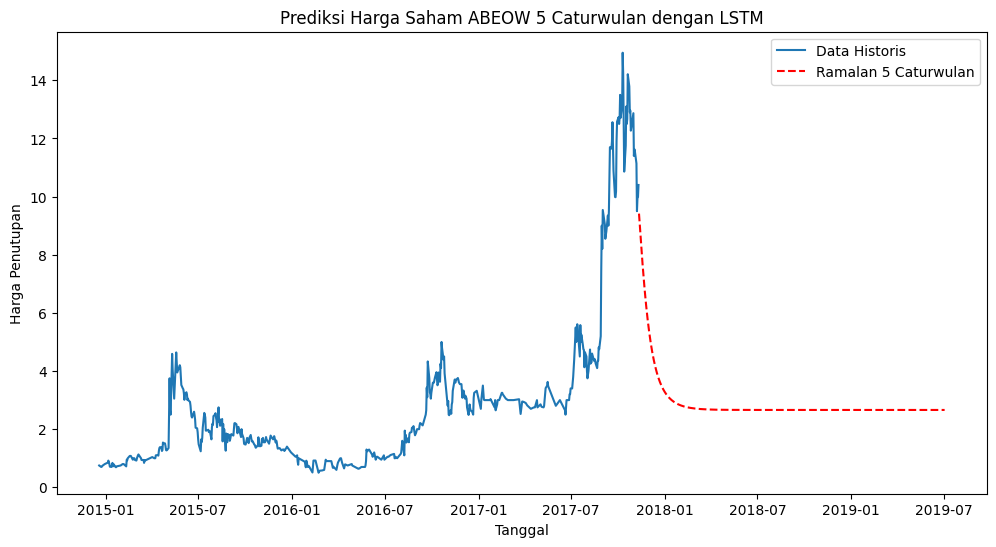

In [ ]:
# Langkah 7: Memprediksi 5 Caturwulan ke Depan
future_steps = 5 * 4 * 30  # 5 caturwulan, setiap caturwulan 4 bulan dengan 30 hari/bulan
last_data = time_series_scaled[-time_step:].reshape(1, time_step, 1)

# Melakukan prediksi untuk 5 caturwulan ke depan
future_forecast = []
for _ in range(future_steps):
    predicted_value = model.predict(last_data)
    future_forecast.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_forecast_rescaled = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Membuat tanggal masa depan (frekuensi harian)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Visualisasi ramalan masa depan
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label='Data Historis')
plt.plot(future_dates, future_forecast_rescaled, label='Ramalan 5 Caturwulan', linestyle='--', color='red')
plt.title('Prediksi Harga Saham ABEOW 5 Caturwulan dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


# ABEV

Pratinjau Dataset:
         Date    Open    High     Low   Close    Volume  OpenInt
0  2007-11-12  2.5614  2.6144  2.4476  2.4492  36766891        0
1  2007-11-13  2.5113  2.6113  2.5113  2.5641  23295780        0
2  2007-11-14  2.6298  2.7217  2.6068  2.6497  45171831        0
3  2007-11-15  2.6208  2.6921  2.5635  2.5985  13383259        0
4  2007-11-16  2.6412  2.6593  2.5989  2.6419  21472065        0


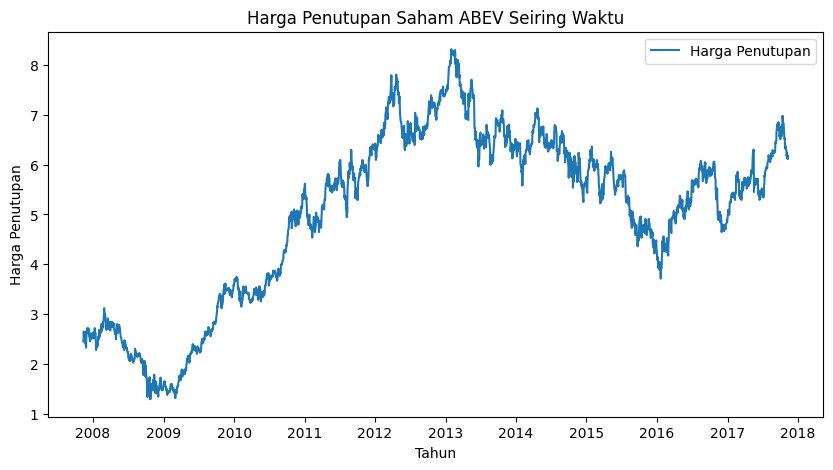

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.0630
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 8.8980e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 8.2377e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 9.2632e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 8.9757e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 8.2331e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 8.3364e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 6.9325e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0013
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 7.0769e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


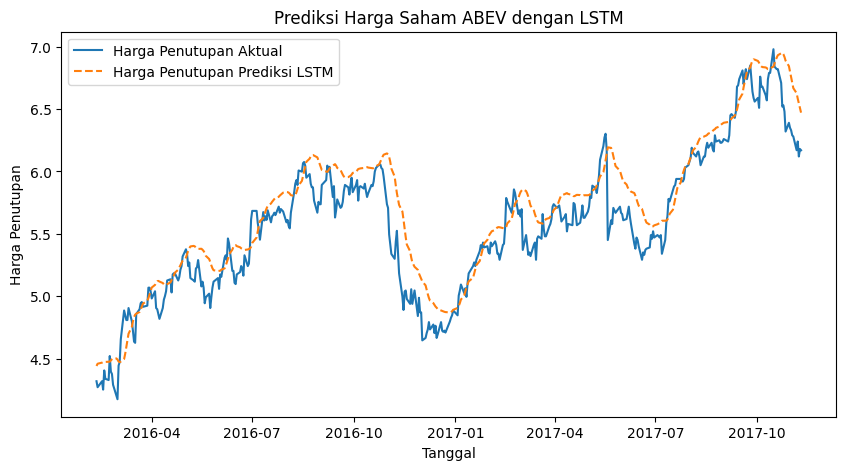

Mean Squared Error pada Data Uji: 0.05


In [ ]:
# Langkah 1: Memuat dataset
file_path = 'abev.us.txt'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print("Pratinjau Dataset:")
print(data.head())

# Langkah 2: Pra-pemrosesan data
# Mengubah kolom 'Date' menjadi format datetime dan menjadikannya sebagai index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memfilter kolom 'Close' untuk prediksi
time_series = data['Close']

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(data.index, time_series, label='Harga Penutupan')
plt.title('Harga Penutupan Saham ABEV Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menormalkan data untuk LSTM (LSTM biasanya bekerja lebih baik dengan data yang terstandarisasi)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Langkah 3: Membuat data pelatihan dan pengujian
train_size = int(len(time_series) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Fungsi untuk mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data pelatihan dan pengujian
time_step = 60  # Gunakan 60 hari sebelumnya untuk memprediksi hari berikutnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubah bentuk X_train dan X_test agar sesuai dengan input LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Langkah 4: Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 5: Melatih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Langkah 6: Evaluasi Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Mengembalikan ke skala asli

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Harga Penutupan Aktual')
plt.plot(data.index[train_size + time_step + 1:], y_pred_rescaled, label='Harga Penutupan Prediksi LSTM', linestyle='--')
plt.title('Prediksi Harga Saham ABEV dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menghitung mean squared error untuk evaluasi
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f"Mean Squared Error pada Data Uji: {mse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

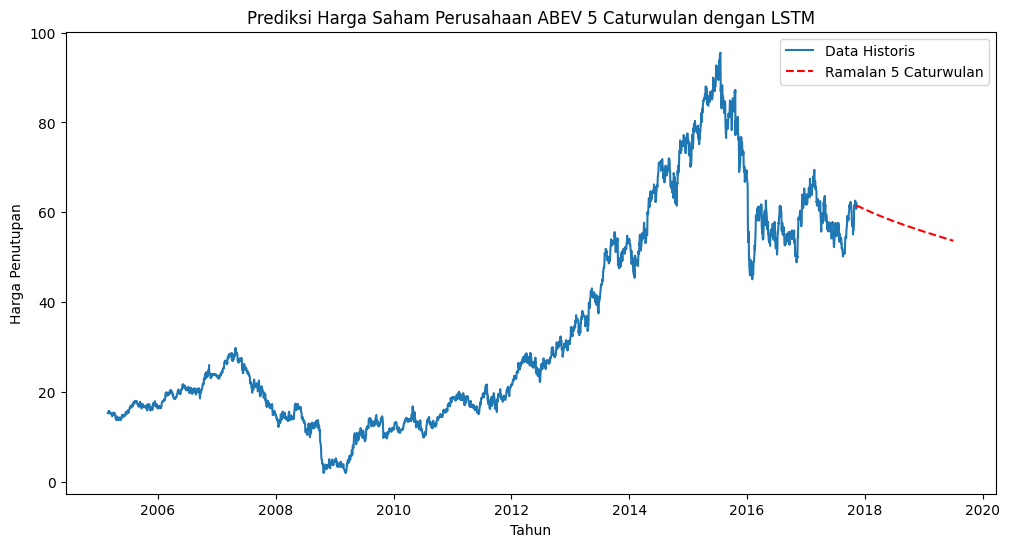

In [ ]:
# Langkah 7: Memprediksi 5 Caturwulan ke Depan
future_steps = 5 * 4 * 30  # 5caturwulan, setiap caturwulan 4 bulan dengan 30 hari/bulan
last_data = time_series_scaled[-time_step:].reshape(1, time_step, 1)

# Melakukan prediksi untuk 8 caturwulan ke depan
future_forecast = []
for _ in range(future_steps):
    predicted_value = model.predict(last_data)
    future_forecast.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_forecast_rescaled = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Membuat tanggal masa depan (frekuensi harian)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Visualisasi ramalan masa depan
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label='Data Historis')
plt.plot(future_dates, future_forecast_rescaled, label='Ramalan 5 Caturwulan', linestyle='--', color='red')
plt.title('Prediksi Harga Saham Perusahaan ABEV 5 Caturwulan dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


#ABG

Pratinjau Dataset:
         Date   Open   High    Low  Close  Volume  OpenInt
0  2005-02-25  15.70  15.75  15.24  15.35   92400        0
1  2005-02-28  15.35  15.55  15.13  15.20   98700        0
2  2005-03-01  15.21  15.86  15.15  15.47   97800        0
3  2005-03-02  15.65  15.77  15.25  15.31   61600        0
4  2005-03-03  15.55  16.00  15.52  15.80  138600        0


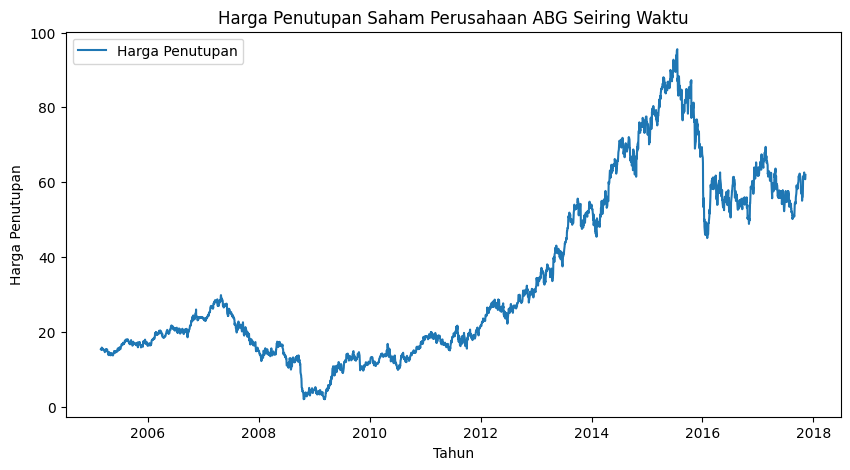

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0276
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 2.3752e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 2.6162e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 2.2427e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 2.3632e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 2.2019e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.1261e-04
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 2.0371e-04
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 2.0202e-04
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 1.8532e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


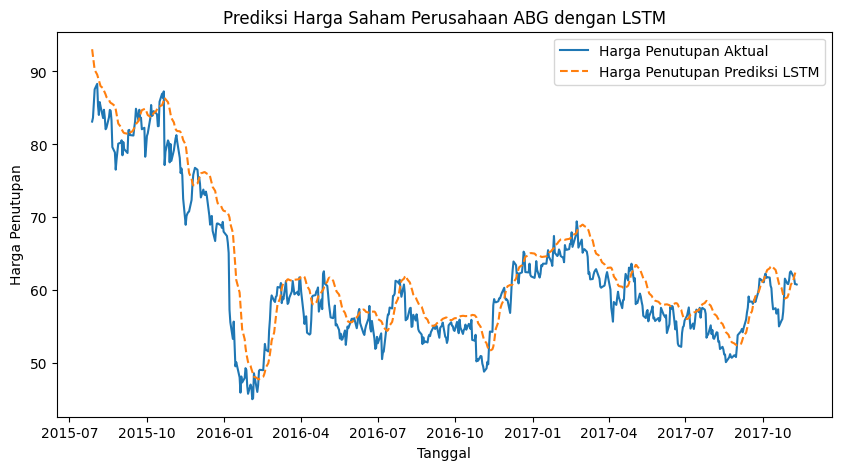

Mean Squared Error pada Data Uji: 12.33


In [ ]:
# Langkah 1: Memuat dataset
file_path = 'abg.us.txt'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print("Pratinjau Dataset:")
print(data.head())

# Langkah 2: Pra-pemrosesan data
# Mengubah kolom 'Date' menjadi format datetime dan menjadikannya sebagai index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memfilter kolom 'Close' untuk prediksi
time_series = data['Close']

# Visualisasi data
plt.figure(figsize=(10, 5))
plt.plot(data.index, time_series, label='Harga Penutupan')
plt.title('Harga Penutupan Saham Perusahaan ABG Seiring Waktu')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menormalkan data untuk LSTM (LSTM biasanya bekerja lebih baik dengan data yang terstandarisasi)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Langkah 3: Membuat data pelatihan dan pengujian
train_size = int(len(time_series) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Fungsi untuk mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data pelatihan dan pengujian
time_step = 60  # Gunakan 60 hari sebelumnya untuk memprediksi hari berikutnya
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubah bentuk X_train dan X_test agar sesuai dengan input LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Langkah 4: Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Langkah 5: Melatih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Langkah 6: Evaluasi Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)  # Mengembalikan ke skala asli

# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Harga Penutupan Aktual')
plt.plot(data.index[train_size + time_step + 1:], y_pred_rescaled, label='Harga Penutupan Prediksi LSTM', linestyle='--')
plt.title('Prediksi Harga Saham Perusahaan ABG dengan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

# Menghitung mean squared error untuk evaluasi
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), y_pred_rescaled)
print(f"Mean Squared Error pada Data Uji: {mse:.2f}")


In [ ]:
# Langkah 7: Memprediksi 5 Caturwulan ke Depan
future_steps = 5 * 4 * 30  # 5 caturwulan, setiap caturwulan 4 bulan dengan 30 hari/bulan
last_data = time_series_scaled[-time_step:].reshape(1, time_step, 1)

# Melakukan prediksi untuk 5 caturwulan ke depan
future_forecast = []
for _ in range(future_steps):
    predicted_value = model.predict(last_data)
    future_forecast.append(predicted_value[0, 0])
    last_data = np.append(last_data[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Mengembalikan hasil prediksi ke skala asli
future_forecast_rescaled = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Membuat tanggal masa depan (frekuensi harian)
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Visualisasi ramalan masa depan
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label='Data Historis')
plt.plot(future_dates, future_forecast_rescaled, label='Ramalan 5 Caturwulan', linestyle='--', color='red')
plt.title('Prediksi Harga Saham Perusahaan ABG 5 Caturwulan dengan LSTM')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━